# World Population Data EDA and Data Visualization

This project has a goal of practicing Exploratory Data Analysis and Data Visualization of the world's population given by the US consenus

At the end of this paper, I want to answer the following question : 
1. What was the world's population for each year ?
2. Rank the countries for each variable
3. What are the countries that surpassed 1 billion in the population ?
4. What are the countries that will surpass 1 billion in the population and in which year ?
5. Create a map with Population Density

## Data Import and Cleaning

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now, we're going to import the data and see the head of It

In [3]:
df = pd.read_csv('countries-table.csv')

df.head()

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,1,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,2,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,3,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,4,1904569.0,1877519.0,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,5,881912.0,770880.0,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468


See the different variables there are and their types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          234 non-null    object 
 1   rank             234 non-null    int64  
 2   area             234 non-null    float64
 3   landAreaKm       234 non-null    float64
 4   cca2             233 non-null    object 
 5   cca3             234 non-null    object 
 6   netChange        226 non-null    float64
 7   growthRate       234 non-null    float64
 8   worldPercentage  228 non-null    float64
 9   density          234 non-null    float64
 10  densityMi        234 non-null    float64
 11  place            234 non-null    int64  
 12  pop1980          234 non-null    int64  
 13  pop2000          234 non-null    int64  
 14  pop2010          234 non-null    int64  
 15  pop2022          234 non-null    int64  
 16  pop2023          234 non-null    int64  
 17  pop2030         

Getting a quick description for each column

In [10]:
df.describe()

,rank,area,landAreaKm,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
count,234.000000,2.340000e+02,2.340000e+02,226.000000,234.000000,228.000000,234.000000,234.000000,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02
mean,117.500000,5.814500e+05,5.571123e+05,0.010306,0.009737,0.004407,451.288182,1168.836388,439.085470,1.898462e+07,2.626947e+07,2.984524e+07,3.407441e+07,3.437442e+07,3.651461e+07,4.148628e+07
std,67.694165,1.761841e+06,1.689972e+06,0.034774,0.012350,0.017375,1979.362419,5126.548664,253.295484,8.178519e+07,1.116982e+08,1.242185e+08,1.367664e+08,1.373864e+08,1.417827e+08,1.481676e+08
min,1.000000,4.400000e-01,4.400000e-01,-0.028600,-0.074500,0.000000,0.138000,0.357400,4.000000,7.330000e+02,6.510000e+02,5.960000e+02,5.100000e+02,5.180000e+02,5.610000e+02,7.310000e+02
25%,59.250000,2.650000e+03,2.625875e+03,0.000000,0.002325,0.000100,39.747650,102.946450,223.000000,2.296142e+05,3.272420e+05,3.931490e+05,4.197385e+05,4.225982e+05,4.561490e+05,5.466058e+05
50%,117.500000,8.119950e+04,7.568925e+04,0.000900,0.008200,0.000750,97.481000,252.475800,439.000000,3.141146e+06,4.292907e+06,4.942770e+06,5.559944e+06,5.643895e+06,6.178231e+06,6.352397e+06
75%,175.750000,4.304258e+05,4.047876e+05,0.008000,0.016850,0.002925,242.928650,629.185350,659.750000,9.826054e+06,1.576230e+07,1.915957e+07,2.247650e+07,2.324537e+07,2.616311e+07,3.568614e+07
max,234.000000,1.709824e+07,1.637687e+07,0.418400,0.049800,0.178500,21402.705200,55433.006400,894.000000,9.823725e+08,1.264099e+09,1.348191e+09,1.425887e+09,1.428628e+09,1.514994e+09,1.670491e+09


You can see that the count for netCHange and worldPercentage is not equal to **234** which is the maximum count, let's see If It had NaN in It

In [23]:
df = df.dropna()
df

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,1,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,2,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,3,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,4,1904569.0,1877519.0,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,5,881912.0,770880.0,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Cook Islands,223,240.0,240.0,CK,COK,0.0000,0.0019,0.0000,71.0167,183.9332,184,17651,15897,17212,17011,17044,17253,17674
223,Anguilla,224,91.0,91.0,AI,AIA,0.0000,0.0026,0.0000,174.7143,452.5100,660,6560,11047,13172,15857,15899,16055,15294
224,Nauru,225,21.0,20.0,NR,NRU,0.0000,0.0088,0.0000,639.0000,1655.0100,520,7635,10377,10241,12668,12780,13358,14695
225,Wallis and Futuna,226,274.0,274.0,WF,WLF,0.0000,-0.0060,0.0000,41.9781,108.7233,876,11315,14723,13142,11572,11502,11229,11349


Now, we're going to show the world population for each year 1980,2000,2010,2022,2023,2030,2050 by summing the population for each year

In [76]:
pop = df[['pop1980','pop2000','pop2010','pop2022','pop2023','pop2030','pop2050']]

world_pop =  pop.sum()

world_pop = world_pop / 10 ** 9

world_pop

pop1980    4.441362
pop2000    6.145164
pop2010    6.981609
pop2022    7.970765
pop2023    8.040930
pop2030    8.541427
pop2050    9.703932
dtype: float64

Plotting the results

Text(0.5, 1.0, 'World Population over Year')

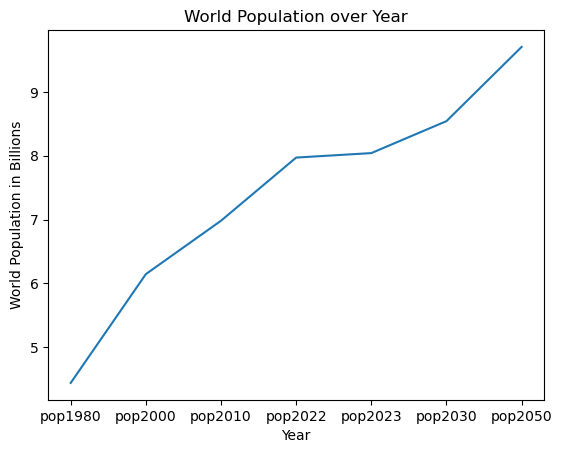

In [78]:
plt.plot(world_pop.index,world_pop.values)

plt.xlabel("Year")
plt.ylabel("World Population in Billions")
plt.title("World Population over Year")

Text(0.5, 1.0, 'World Population over Year')

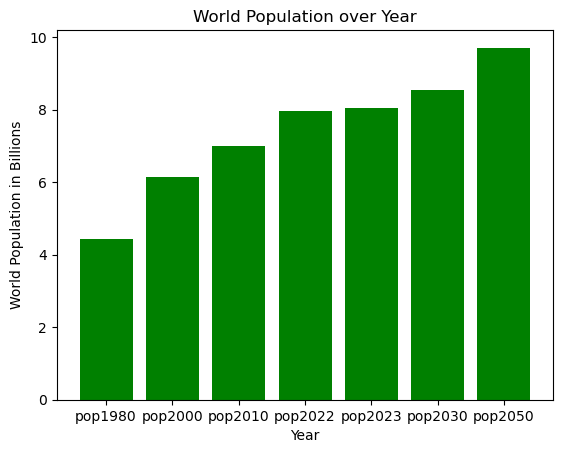

In [80]:
plt.bar(world_pop.index,world_pop.values,color='green')

plt.xlabel("Year")
plt.ylabel("World Population in Billions")
plt.title("World Population over Year")

## Sorting the countries ( Top 5 )

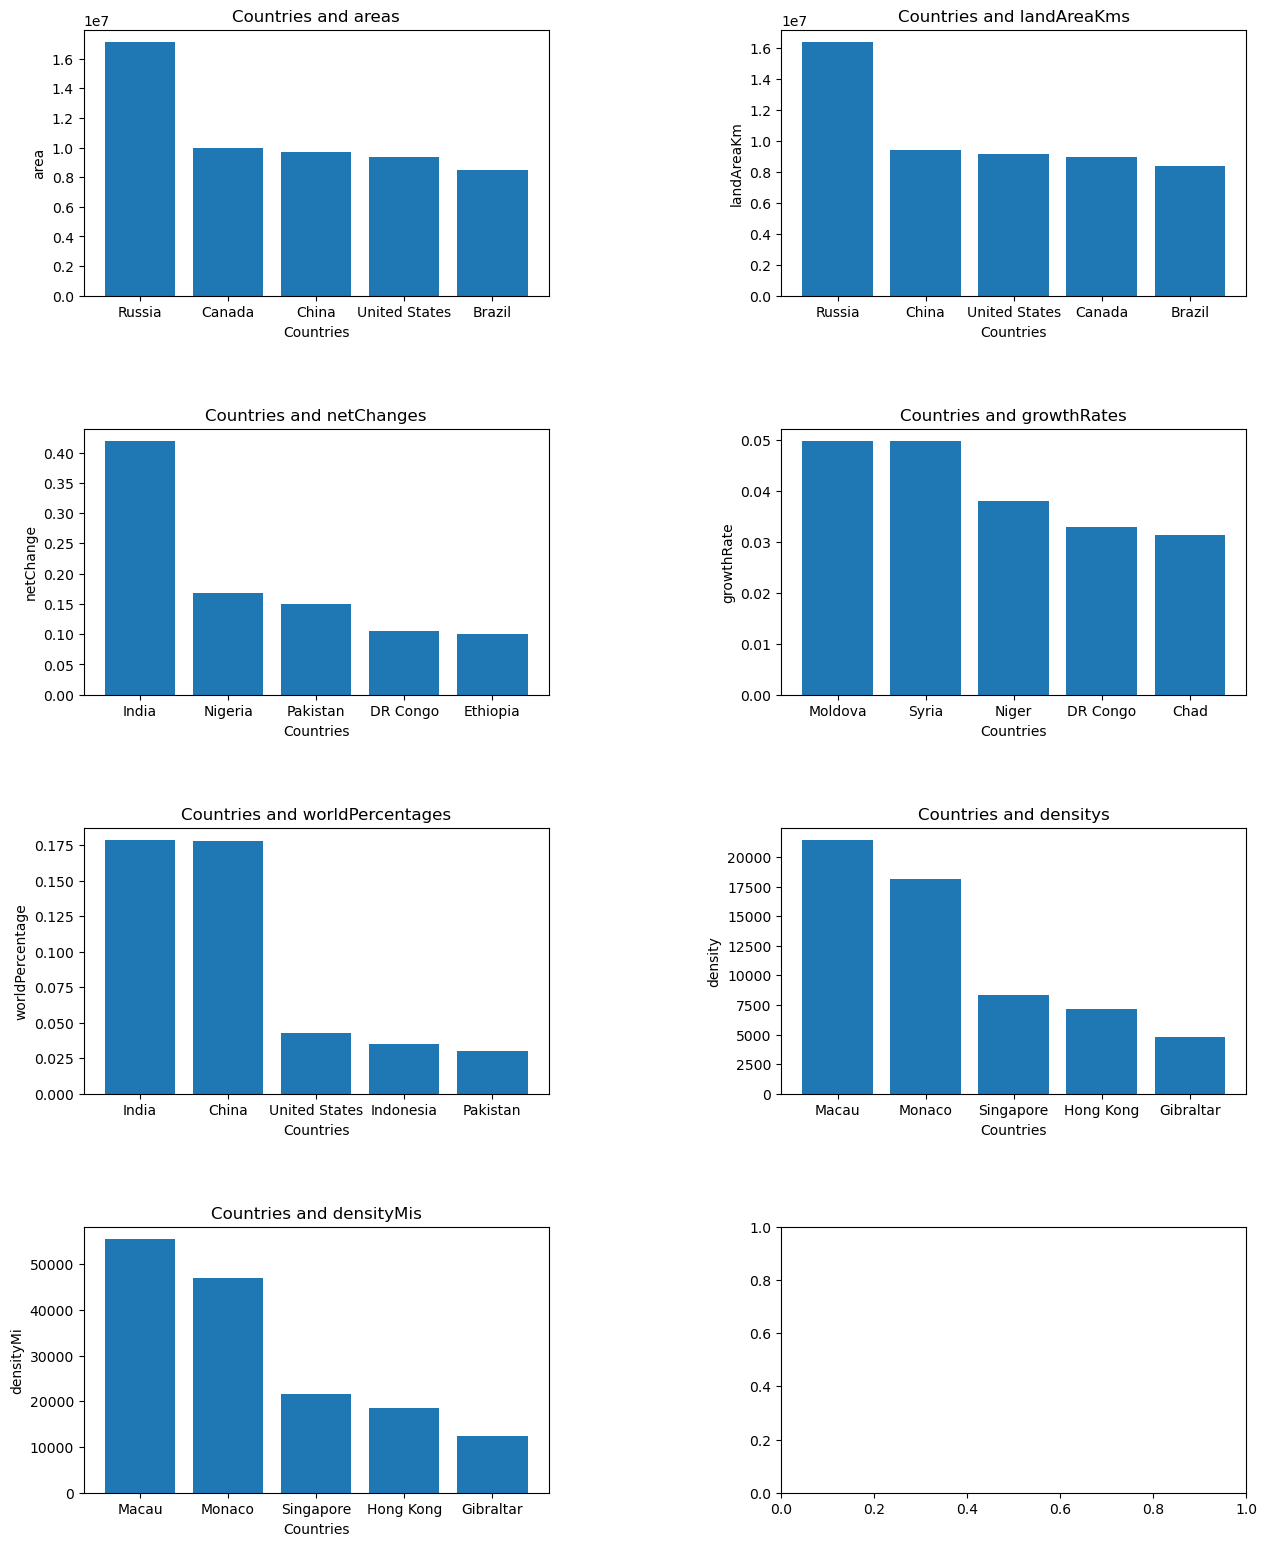

In [139]:
# We're going to take the top 5 countries based on area

columns = ['area','landAreaKm','netChange','growthRate','worldPercentage','density','densityMi']

# Creating the subplot
fig,axes = plt.subplots(nrows=4,ncols=2,figsize=(15,19))
ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]
ax5 = axes[2,0]
ax6 = axes[2,1]
ax7 = axes[3,0]

axe_arr = [ax1,ax2,ax3,ax4,ax5,ax6,ax7]
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for index,column in enumerate(columns):
    area_df = df.sort_values(by=column, ascending=False).head()
    axe_arr[index].bar(area_df['country'],area_df[column])
    axe_arr[index].set_xlabel("Countries")
    axe_arr[index].set_ylabel(column)
    axe_arr[index].set_title(f'Countries and {column}s')

### Surpassing the 1 billion 

In this section, we will find the countries who surpassed the 1 billion in population, and which one will surpass and in which year

In [144]:
billion_cond = df['pop2023'] >= 10 ** 9

bill_countries = df[billion_cond]['country']

print(f"The countries that have surpassed the 1 billion mark are {bill_countries[0]} and {bill_countries[1]}")

The countries that have surpassed the 1 billion mark are India and China


In [150]:
billion_cond2 = (df['pop2030'] >= 10 ** 9) | (df['pop2050'] >= 10 ** 9)

bill_countries = df[billion_cond2]['country']

print(f"The countries that have surpassed the 1 billion mark in 2030 and 2050 are {bill_countries[0]} and {bill_countries[1]}")

The countries that have surpassed the 1 billion mark in 2030 and 2050 are India and China


## Density on Map

/tmp/ipykernel_205355/1027112701.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<AxesSubplot: >

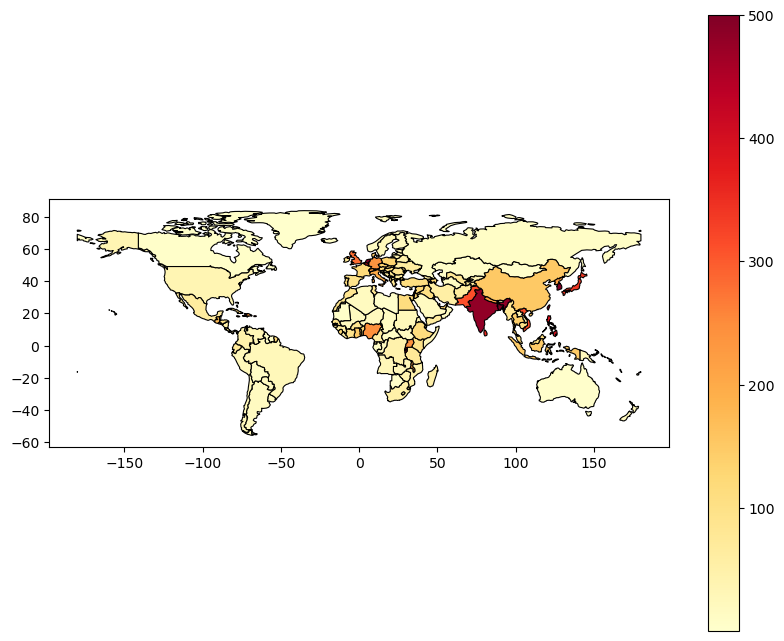

In [181]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged_data = world.merge(df,left_on='iso_a3',right_on='cca3')

fig, ax = plt.subplots(figsize=(10, 8))

merged_data.plot(ax=ax, column='density', cmap='YlOrRd', linewidth=0.8, edgecolor='black', legend=True,vmax=500)